# imports

In [1]:
%load_ext autoreload
%autoreload 2
packages = !conda list
len(packages),packages

(455,
 ['# packages in environment at /Users/brucecottman/anaconda3:',
  '#',
  '# Name                    Version                   Build  Channel',
  '_anaconda_depends         2019.10                  py37_0  ',
  '_ipyw_jlab_nb_ext_conf    0.1.0                    py37_0  ',
  'absl-py                   0.7.0                    pypi_0    pypi',
  'alabaster                 0.7.12                   py37_0  ',
  'altair                    4.0.0                    pypi_0    pypi',
  'anaconda                  custom                   py37_1  ',
  'anaconda-client           1.7.2                    py37_0  ',
  'anaconda-navigator        1.9.6                    py37_0  ',
  'anaconda-project          0.8.2                    py37_0  ',
  'appdirs                   1.4.3                    pypi_0    pypi',
  'appnope                   0.1.0                    py37_0  ',
  'appscript                 1.0.1            py37h1de35cc_1  ',
  'argh                      0.26.2                 

## common imports

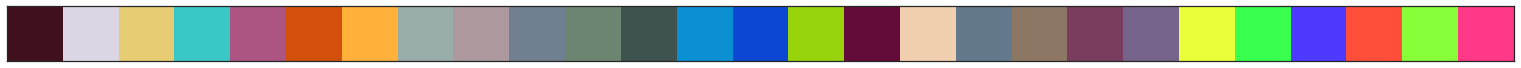

In [28]:
from __future__ import print_function
import matplotlib
import matplotlib.dates as mdates
import matplotlib.ticker as mtick
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

import sys, os
import io
from typing import Dict, Pattern

import seaborn as sns; sns.set()  # for plot styling
#set font size of labels on matplotlib plots
plt.rc('font', size=16)

#set style of plots
sns.set_style('white')

#define a custom palette
PALLET = ['#40111D', '#DCD5E4', '#E7CC74'
                 ,'#39C8C6', '#AC5583', '#D3500C'
                 ,'#FFB139', '#98ADA7', '#AD989E'
                 ,'#708090','#6C8570','#3E534D'

                 ,'#0B8FD3','#0B47D3','#96D30B'                 
                 ,'#630C3A','#F1D0AF','#64788B'                 
                 ,'#8B7764','#7A3C5D','#77648B'
                 ,'#eaff39','#39ff4e','#4e39ff'
                 ,'#ff4e39','#87ff39','#ff3987', ]
N_PALLET = len(PALLET)
sns.set_palette(PALLET)
sns.palplot(PALLET)

## finance imports

In [3]:
#!pip install pandas_datareader #if not already installed 
from pandas import to_datetime, DataFrame
from statistics import stdev
from pandas_datareader.data import DataReader
from math import inf
from pandas_datareader.data import DataReader
import copy
import plotly.express as px

## local imports

In [4]:
# add if you want to add google driveAssertionError
old__file__ = !pwd
__file__ =  old__file__  #!cd ../../NLP ;pwd
#__file__ = !pwd
#__file__ = '/gdrive/My Drive'

sys.path.append(__file__)
print(sys.path)
os.chdir(old__file__[0])
!pwd
__file__

['/Users/brucecottman/Documents/PROJECTS/FinMrkt/src', '/usr/local/Cellar/apache-spark/2.0.1/libexec/python', '/Users/brucecottman/Documents/PROJECTS/FinMrkt/src/$', '/Library/Frameworks/Python.framework/Versions/3.7/lib/python37.zip', '/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7', '/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/lib-dynload', '', '/Users/brucecottman/Library/Python/3.7/lib/python/site-packages', '/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages', '/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/IPython/extensions', '/Users/brucecottman/.ipython', ['/Users/brucecottman/Documents/PROJECTS/FinMrkt/src']]
/Users/brucecottman/Documents/PROJECTS/FinMrkt/src


['/Users/brucecottman/Documents/PROJECTS/FinMrkt/src']

## import from  /PROJECTS/FinMrkt/src/base

In [5]:
from base import FutureValue_, nppy_
from base import return_fit, price_std,  price_std_f
from base import p_or_r_std, p_or_r_std_f, ticket_read
from base import register_DataFrame_method


#  functions

## function Recessions_plot

In [6]:
def Recessions_plot(ax, start_date, end_date):
    ticker = 'USREC'
    rd_type = 'fred'
    Recession_df = DataReader(ticker, rd_type, 
                            start = start_date, end = end_date) 

    Recession_df['index']= Recession_df.index
    threshold = 0
    ax.fill_between(Recession_df['index'], 0, 1, where=Recession_df[Recession_df.columns[0]] > threshold,
                    color='green', alpha=0.5, transform=ax.get_xaxis_transform())
    return(1)

## function  Fed_indexes_corr

In [42]:
def Fed_indexes_corr(Primary_df, Secondary_df, 
                          condition = [-inf, inf],
                          shift__=0, 
                          bottom_year = '1985/1/01',
                          top_year = '1/1/2060'):
                          
    plt.figure(figsize=(12, 8))
    Secondary_df['index']= Secondary_df.index
    Primary_df['index']= Primary_df.index
    # make sure on a loop
    Primary_df[Secondary_df.columns[0]] = 0
    
    Secondary_df = Secondary_df[Primary_df['index'] > bottom_year]
    Primary_df = Primary_df[Primary_df['index'] > bottom_year]
    Secondary_df = Secondary_df[Primary_df['index' ] < top_year]   
    Primary_df = Primary_df[Primary_df['index' ] < top_year]
# condition
    Secondary_df = Secondary_df[Primary_df[Primary_df.columns[0]] > condition[0]]
    Primary_df = Primary_df[Primary_df[Primary_df.columns[0]] > condition[0]]
    Primary_df = Primary_df.shift(shift__)
    
#    1st plot
    ax = sns.lineplot(x='index', y =  Primary_df.columns[0],
                      color='red', linewidth=2.5, data=Primary_df)
    ax.yaxis.set_major_formatter(mtick.PercentFormatter())
# recession bars
    Recessions_plot(ax, bottom_year, top_year)
# 2nd subplot
    ax2 = ax.twinx()
    sns.lineplot(x='index', y=Secondary_df.columns[0], 
                 data=Secondary_df, color='black',
                 linewidth=2.5, ax=ax2)
    if Secondary_df.iloc[0,0] < 99 : ax2.yaxis.set_major_formatter(mtick.PercentFormatter())
    plt.show()
#heatmap
    Primary_df[Secondary_df.columns[0]] = Secondary_df[Secondary_df.columns[0]]
    hm = Primary_df.corr()
    sns.heatmap(hm, annot=True)
    plt.show()
    return hm

# read

## read function ticker_data

In [86]:
def plot_ticker_data(ticker_df, fx_size=15, fy_size=8, color_ = 'black'):
    plt.figure(figsize=(fx_size, fy_size))
    sns.set_theme(style="whitegrid")
    sns.lineplot(data=ticker_df, color = color_, linewidth=2.5)
    ticker_df.head(n=2), ticker_df.tail(n=2)
    return(ticker_df)

In [81]:
def read_ticker_data(rd_type = 'fred', ticker ='fedfunds',
                   fx_size=15, fy_size=8, color_ = 'black',
                   start_date = '1985/1/01', end_date = '2022/07/30'):

    ticker_df = DataReader(ticker, rd_type, 
                           start = start_date, end = end_date)
    return(ticker_df)

## rolling 12-month

In [82]:
def rolling_12_month(data_df):

    window = 12
    center_=False
    axis_ = 0
    closed_ = 'neither'
    data_df[data_df.columns[0]] = data_df[data_df.columns[0]].rolling(window, center=center_,  axis=axis_, closed=closed_).sum()/window
    return(data_df)


In [94]:
def read_FED_Rate(start_date = '1985/1/01',
                    end_date = '2022/07/30'):
    FED_Rate_df = read_ticker_data() #defaults are FRED CPI
    return(FED_Rate_df) 

In [91]:
def read_CPI(start_date = '1985/1/01',
                end_date = '2022/07/30'):
    
    CPI_df = read_ticker_data(rd_type = 'fred', ticker ='MEDCPIM158SFRBCLE')
    return(CPI_df) 

## retrieve Recession data

In [95]:
def read_Recession(start_date = '1985/1/01',
                    end_date = '2022/07/30'):

    CPI_df = read_ticker_data(rd_type = 'fred', ticker ='USREC')
    return(CPI_df) 

## retrieve Fed rate

(         fedfunds
 count  450.000000
 mean     3.364289
 std      2.816706
 min      0.050000
 25%      0.370000
 50%      3.030000
 75%      5.520000
 max      9.850000,
             fedfunds
 DATE                
 1985-01-01      8.35
 1985-02-01      8.50
 1985-03-01      8.58
 1985-04-01      8.27
 1985-05-01      7.97,
             fedfunds
 DATE                
 2022-02-01      0.08
 2022-03-01      0.20
 2022-04-01      0.33
 2022-05-01      0.77
 2022-06-01      1.21)

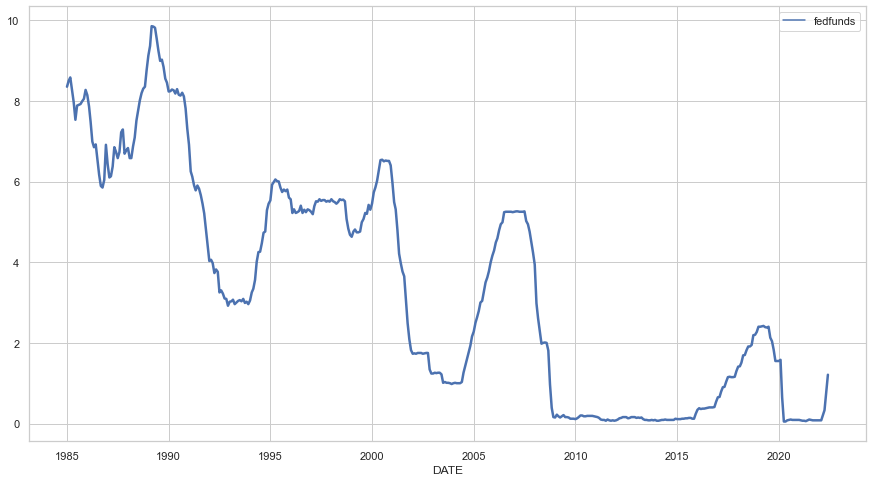

In [85]:
FEDFUNDSRate_df=read_FED_Rate()
plot_ticker_data(FEDFUNDSRate_df, fx_size=15, fy_size=8, color_ = 'black')
FEDFUNDSRate_df.describe(), FEDFUNDSRate_df.head(), FEDFUNDSRate_df.tail()

## retrieve CPI

(       MEDCPIM158SFRBCLE
 count         450.000000
 mean            2.901292
 std             1.166300
 min            -0.286064
 25%             2.202506
 50%             2.763044
 75%             3.435887
 max             7.800000,
             MEDCPIM158SFRBCLE
 DATE                         
 1985-01-01           3.074903
 1985-02-01           5.603398
 1985-03-01           4.714338
 1985-04-01           4.493616
 1985-05-01           3.307093,
             MEDCPIM158SFRBCLE
 DATE                         
 2022-02-01           6.506399
 2022-03-01           5.902594
 2022-04-01           6.527993
 2022-05-01           7.211770
 2022-06-01           7.800000)

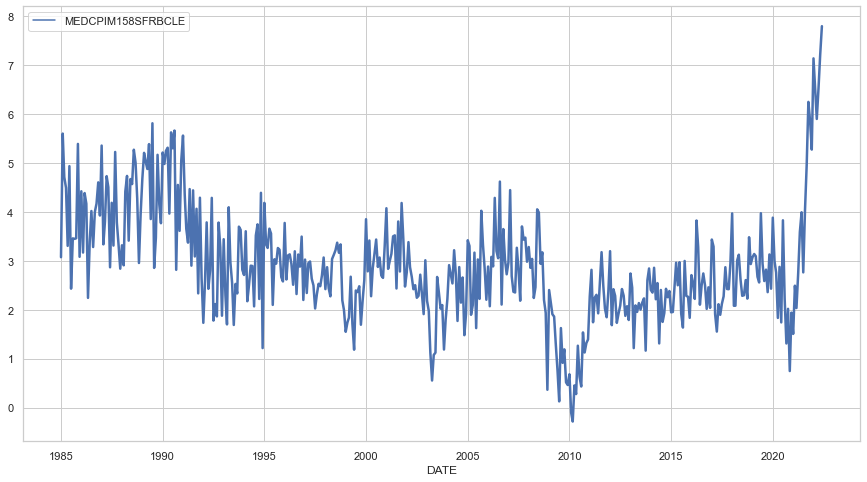

In [89]:
CPI_df=read_CPI()
CPI_df.loc[pd.to_datetime('2022-06-01')] = [7.8]
plot_ticker_data(CPI_df, fx_size=15, fy_size=8, color_ = 'red')
CPI_df.describe(), CPI_df.head(), CPI_df.tail()

## 12-month rolling CPI

(       MEDCPIM158SFRBCLE
 count         439.000000
 mean            2.840262
 std             0.850451
 min             0.535384
 25%             2.352304
 50%             2.749519
 75%             3.135526
 max             5.852696,
             MEDCPIM158SFRBCLE
 DATE                         
 1985-01-01                NaN
 1985-02-01                NaN
 1985-03-01                NaN
 1985-04-01                NaN
 1985-05-01                NaN,
             MEDCPIM158SFRBCLE
 DATE                         
 2022-02-01           4.596173
 2022-03-01           4.918412
 2022-04-01           5.233739
 2022-05-01           5.535537
 2022-06-01           5.852696)

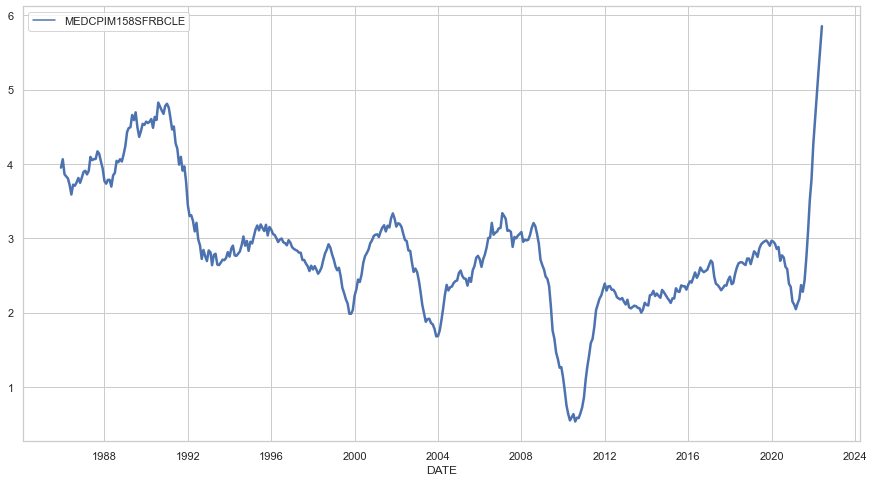

In [98]:
CPI_df=read_CPI()
CPI_df.loc[pd.to_datetime('2022-06-01')] = [7.8]
CPI_df=rolling_12_month(CPI_df)
plot_ticker_data(CPI_df, fx_size=15, fy_size=8, color_ = 'green')
CPI_df.describe(), CPI_df.head(), CPI_df.tail()

## plot recession

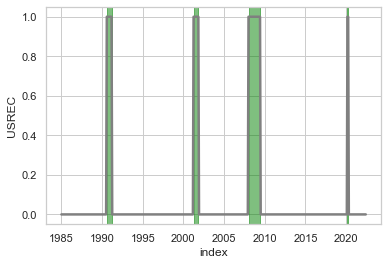

In [97]:
Recession_df = read_Recession()

Recession_df['index']= Recession_df.index
ax = sns.lineplot(x='index', y=Recession_df.columns[0], data=Recession_df,color="grey", linewidth=2.5)

threshold = 0
ax.fill_between(Recession_df['index'], 0, 1, where=Recession_df[Recession_df.columns[0]] > threshold,
                color='green', alpha=0.5, transform=ax.get_xaxis_transform())


# CPI vs Fed rate

## 2 plot trial of rolling CPI

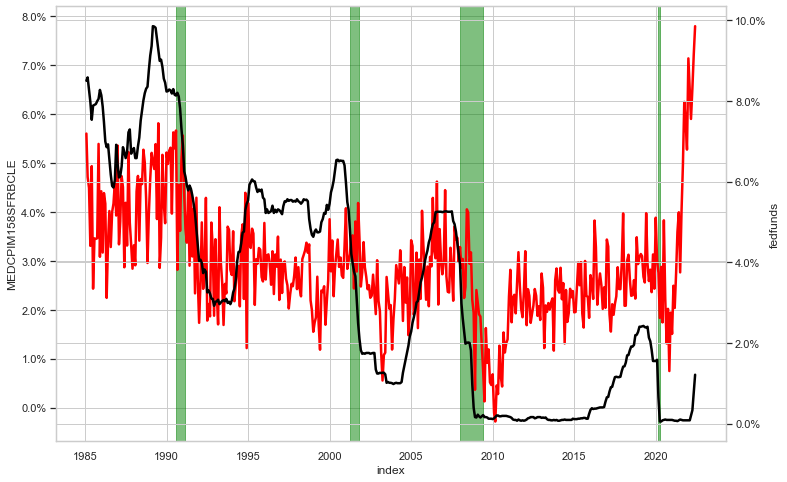

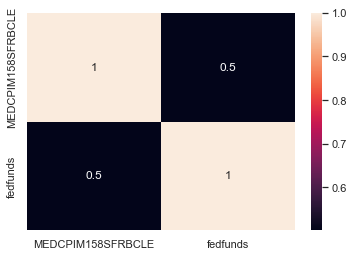

,MEDCPIM158SFRBCLE,fedfunds
MEDCPIM158SFRBCLE,1.000000,0.501332
fedfunds,0.501332,1.000000


In [43]:
Fed_indexes_corr(CPI_df,FEDFUNDSRate_df)

##  monthy PI vs FED rate only for  to present

In [ ]:
maxsh = 0
maxcorr = 0.0
for sh in range(0, 3, 3):
    hm=Fed_indexes_corr(CPI_df_monthly, FEDFUNDSRate_df, shift__= sh, 
                            bottom_year='1985-1-01',
                            top_year='2027-12-01')
    print('shift:', sh, '   corr:', hm.iloc[0,1])
    if hm.iloc[0,1] > maxcorr: 
        maxcorr = hm.iloc[0,1]
        maxsh = sh
print('shift:', maxsh, '   corr:',maxcorr)

##  monthy PI vs FED rate only for  to 2008

In [ ]:
maxsh = 0
maxcorr = 0.0
for sh in range(0, 3, 3):
    hm=Fed_indexes_corr(CPI_df_monthly, FEDFUNDSRate_df, shift__= sh, 
                            bottom_year='1985-1-01',
                            top_year='2008-1-01')
    print('shift:', sh, '   corr:', hm.iloc[0,1])
    if hm.iloc[0,1] > maxcorr: 
        maxcorr = hm.iloc[0,1]
        maxsh = sh
print('shift:', maxsh, '   corr:',maxcorr)

## 12 month rolling average CPI vs Fed rate to present

In [ ]:
maxsh = 0
maxcorr = 0.0
for sh in range(0, 3, 3):
    hm=Fed_indexes_corr(CPI_df, FEDFUNDSRate_df, shift__= sh, 
                            bottom_year='1985-1-01',
                            top_year='2027-12-01')
    print('shift:', sh, '   corr:', hm.iloc[0,1])
    if hm.iloc[0,1] > maxcorr: 
        maxcorr = hm.iloc[0,1]
        maxsh = sh
print('shift:', maxsh, '   corr:',maxcorr)

## 12 month rolling average CPI vs Fed rate to 2008

In [ ]:
maxsh = 0
maxcorr = 0.0
for sh in range(0, 3, 3):
    hm=Fed_indexes_corr(CPI_df, FEDFUNDSRate_df, shift__= sh, 
                            bottom_year='1985-1-01',
                            top_year='2008-1-01')
    print('shift:', sh, '   corr:', hm.iloc[0,1])
    if hm.iloc[0,1] > maxcorr: 
        maxcorr = hm.iloc[0,1]
        maxsh = sh
print('shift:', maxsh, '   corr:',maxcorr)

 
## FED rate only for rolling CPI to 2008

In [ ]:
maxsh = 0
maxcorr = 0.0
for sh in range(-12, 12, 3):
    hm=Fed_indexes_corr(CPI_df, FEDFUNDSRate_df, shift__= sh, 
                            bottom_year='1985-1-01',
                            top_year='2008-1-01')
    print('shift:', sh, '   corr:', hm.iloc[0,1])
    if hm.iloc[0,1] > maxcorr: 
        maxcorr = hm.iloc[0,1]
        maxsh = sh

# total history with 6 month rolling average CPI vs BBKMCY
maxcorr = 0.0
for sh in range(0, 6):
    hm=Inflation_CPI_two_plt(BBKMCY_df, FEDFUNDSRate_df, condition=0.0, shift= sh, bottom_year='1960-12-01',
                             top_year='2029-12-01')
    print('shift:', sh, '   corr:', hm.iloc[0,1])
    if hm.iloc[0,1] > maxcorr: 
        maxcorr = hm.iloc[0,1]
        maxsh = sh
print('shift:', maxsh, '   corr:',maxcorr)

## Retrieve Brave-Butters-Kelley Cycle Component of GDP 

Earlier this year, a new “big data” activity index was introduced in an Economic Perspectives article.1 This index was constructed from 500 monthly measures of growth in U.S. economic activity and quarterly U.S. real GDP growth. To recap that work, the authors developed what is referred to as a mixed-frequency collapsed dynamic factor model2 that allowed for the estimation of the unobserved monthly evolution of quarterly U.S. real GDP growth based on the variation in a panel of 500 monthly time series. Included in this panel were the coincident, leading, and lagging monthly real activity indicators commonly used to assess the state of the business cycle for the United States. Using this model, the authors then decomposed monthly real GDP growth into three separate components: trend, cycle, and irregular components. The big data activity index represented the cycle component of this decomposition and was shown to have several highly desirable properties, including being 99% accurate in aligning with historical U.S. recessions and expansions as defined by the National Bureau of Economic Research (NBER) since 1960.3

## read in again MEDCPIM158SFRBCLE

In [ ]:
plt.figure(figsize=(15, 8))
ticker = 'MEDCPIM158SFRBCLE'
rd_type = 'fred'
start_date = '1985/1/01'
end_date = '2022/07/30'
CPI_df = DataReader(ticker, rd_type, 
                        start = start_date, end = end_date)
sns.set_theme(style="whitegrid")
sns.lineplot(data=CPI_df, palette="tab10", linewidth=2.5)

## 12 month rolling average MEDCPIM158SFRBCLE

In [ ]:
plt.figure(figsize=(15, 8))
ticker = 'MEDCPIM158SFRBCLE'
rd_type = 'fred'
start_date = '1985/1/01'
end_date = '2022/07/30'
CPI_df = DataReader(ticker, rd_type, 
                        start = start_date, end = end_date)
CPI_df.loc[pd.to_datetime('2022-06-01')] = [7.8]
window = 12
center_=False
axis_ = 0
closed_ = 'neither'
CPI_df[CPI_df.columns[0]] = CPI_df[CPI_df.columns[0]].rolling(window, center=center_,  axis=axis_, closed=closed_).sum()/window

sns.set_theme(style="whitegrid")
sns.lineplot(data=CPI_df, palette="tab10", linewidth=2.5)
CPI_df.shape


## Read BBKMCY

In [ ]:
plt.figure(figsize=(15, 8))
ticker = 'BBKMCY'
rd_type = 'fred'
start_date = '1985/1/01'
end_date = '2022/07/30'
BBKMCY_df = DataReader(ticker, rd_type, 
                        start = start_date, end = end_date)
sns.set_theme(style="whitegrid")
sns.lineplot(data=BBKMCY_df, color="black", linewidth=2.5)
BBKMCY_df

## 12 month rolling average BBKMCY

In [ ]:
plt.figure(figsize=(15, 8))
ticker = 'BBKMCY'
rd_type = 'fred'
start_date = '1985/1/01'
end_date = '2022/07/30'
BBKMCY_df = DataReader(ticker, rd_type, 
                        start = start_date, end = end_date)
BBKMCY_df.loc[pd.to_datetime('2022-06-01')] = [-0.69]
window = 12
center_=False
axis_ = 0
closed_ = 'neither'
BBKMCY_df[BBKMCY_df.columns[0]] = BBKMCY_df[BBKMCY_df.columns[0]].rolling(window, center=center_,  axis=axis_, closed=closed_).sum()/window

sns.set_theme(style="whitegrid")
sns.lineplot(data=BBKMCY_df, palette="tab10", linewidth=2.5)
BBKMCY_df

## 12 month rolling, CPI_df   vs BBKMCY

In [ ]:
maxsh =  0.0 
maxcorr = -1.1
for sh in range(0, 1):
    hm=Fed_indexes_corr(CPI_df , BBKMCY_df,  shift__= sh, bottom_year='1985-12-01',
                             top_year='2029-11-01')
    print('shift:', sh, '   corr:', hm.iloc[0,1])
    if hm.iloc[0,1] > maxcorr: 
        maxcorr = hm.iloc[0,1]
        maxsh = sh
print('shift:', maxsh, '   corr:',maxcorr)

## 12 month rolling average  CPI vs BBKMCY to 2008

In [ ]:
maxsh = 0
maxsh = -1.
for sh in range(0, 3, 3):
    hm=Fed_indexes_corr(CPI_df, BBKMCY_df,  shift__= 0, bottom_year='1985-12-01',
                             top_year='2008-1-01')
    print('shift:', sh, 'bb   corr:', hm.iloc[0,1])
    if hm.iloc[0,1] > maxcorr: 
        maxcorr = hm.iloc[0,1]
        maxsh = sh
print('shift:', maxsh, '   corr:',maxcorr)

## 12 month rolling average  CPI vs BBKMCY from 2008 to 2016

In [ ]:
maxsh = 0
maxsh = -1.
for sh in range(0, 3, 3):
    hm=Fed_indexes_corr(CPI_df, BBKMCY_df,  shift__= 0, bottom_year='2008-12-01',
                             top_year='2016-1-01')
    print('shift:', sh, 'bb   corr:', hm.iloc[0,1])
    if hm.iloc[0,1] > maxcorr: 
        maxcorr = hm.iloc[0,1]
        maxsh = sh
print('shift:', maxsh, '   corr:',maxcorr)

In [ ]:
maxsh = 0
maxsh = -1.
for sh in range(0, 3, 3):
    hm=Fed_indexes_corr(CPI_df, BBKMCY_df,  shift__= 0, bottom_year='2008-12-01',
                             top_year='2016-1-01')
    print('shift:', sh, 'bb   corr:', hm.iloc[0,1])
    if hm.iloc[0,1] > maxcorr: 
        maxcorr = hm.iloc[0,1]
        maxsh = sh
print('shift:', maxsh, '   corr:',maxcorr)

## 12 month rolling average  CPI vs BBKMCY from 2016 to present

In [ ]:
maxsh = 0
maxsh = -1.
for sh in range(0, 3, 3):
    hm=Fed_indexes_corr(CPI_df, BBKMCY_df,  shift__= 0, bottom_year='2010-1-01',
                             top_year='2027-1-01')
    print('shift:', sh, 'bb   corr:', hm.iloc[0,1])
    if hm.iloc[0,1] > maxcorr: 
        maxcorr = hm.iloc[0,1]
        maxsh = sh
print('shift:', maxsh, '   corr:',maxcorr)

# IXIC

In [ ]:
plt.figure(figsize=(15, 8))
ticker = '^IXIC'
rd_type = 'yahoo'
start_date = '1985/01/01' 
end_date = '2027/07/30'
Stock_df = DataReader(ticker, rd_type, 
                        start = start_date, end = end_date)
window = 12
center_=False
axis_ = 0
closed_ = 'neither'
#Stock_df[Stock_df.columns[0]] = Stock_df[Stock_df.columns[0]].rolling(window, center=center_,  axis=axis_, closed=closed_).sum()/window
Stock_df['index']= Stock_df.index
Stock_df.drop(['High', 'Low','Open', 'Close', 'Volume'], axis=1, inplace=True)


Stock_df = Stock_df.groupby(pd.Grouper(key='index', freq='M')).mean()
Stock_df =  Stock_df.iloc[:-1] #sns.set_theme(style="whitegrid")
Stock_df.columns = [ticker if x=='Adj Close' else x for x in Stock_df.columns]

Stock_df_save = Stock_df

sns.lineplot(data=Stock_df, color="black", linewidth=2.5)

Stock_df_save.head(), Stock_df_save.tail()

In [ ]:
plt.figure(figsize=(15, 8))
ticker = 'MEDCPIM158SFRBCLE'
rd_type = 'fred'
start_date = '1985/01/01' 
end_date = '2027/07/30'
CPI_df = DataReader(ticker, rd_type, 
                        start = start_date, end = end_date)
CPI_df.loc[pd.to_datetime('2022-06-01')] = [7.8]


window = 12
center_=False
axis_ = 0
closed_ = 'neither'
CPI_df[CPI_df.columns[0]] = CPI_df[CPI_df.columns[0]].rolling(window, center=center_,  axis=axis_, closed=closed_).sum()/window
CPI_df['index'] = CPI_df.index
CPI_df_save = CPI_df
sns.set_theme(style="whitegrid")
sns.lineplot(data=CPI_df, palette="tab10", linewidth=2.5)
CPI_df.shape,CPI_df.tail()

## 12 month rolling, CPI_df 

In [ ]:
CPI_df = CPI_df_save
Stock_df = Stock_df_save
CPI_df = CPI_df.groupby(pd.Grouper(key='index', freq='M')).mean()
Stock_df_save = Stock_df
Stock_df.head(), CPI_df.head(), Stock_df.tail(), CPI_df.tail(), Stock_df.shape,  CPI_df.shape

 ## 12 month rolling, CPI_df   vs IXIC

In [ ]:
min_sh = 0
max_sh = 0
min_corr = 1
max_corr = -1 
end_date = maxsh = 0

end_date = '2022/07/30'
for sh in range(0, 3, 3):
    hm=Fed_indexes_corr(CPI_df, Stock_df,  shift__= 0, bottom_year='1985-1-01',
                             top_year=end_date)
    print('shift:', sh, '   corr:', hm.iloc[0,1])
    if hm.iloc[0,1] > max_corr : 
        max_corr = hm.iloc[0,1]
        max_sh = sh
    elif hm.iloc[0,1] < min_corr : 
        min_corr = hm.iloc[0,1]
        min_sh = sh

print('shift:', min_sh, max_sh, '   corr:',max_corr, min_corr)



## CPI vs IXIC to 2009

In [ ]:
maxsh = 0
maxsh = -1.
end_date = maxsh = 0
maxsh = -1.
end_date = '2009/01/30'
for sh in range(-3, 3, 1):
    hm=Fed_indexes_corr(CPI_df, Stock_df,  shift__= 0, bottom_year='1985-1-01',
                             top_year=end_date)
    print('shift:', sh, '   corr:', hm.iloc[0,1])
    if hm.iloc[0,1] > maxcorr: 
        maxcorr = hm.iloc[0,1]
        maxsh = sh
print('shift:', maxsh, '   corr:',maxcorr)


In [ ]:
maxsh = 0
maxsh = -1.
end_date = maxsh = 0
maxsh = -1.
end_date = '2009/01/30'
for sh in range(-3, 3, 1):
    hm=Fed_indexes_corr(CPI_df, Stock_df,  shift__= 0, bottom_year='1985-1-01',
                             top_year=end_date)
    print('shift:', sh, '   corr:', hm.iloc[0,1])
    if hm.iloc[0,1] > maxcorr: 
        maxcorr = hm.iloc[0,1]
        maxsh = sh
print('shift:', maxsh, '   corr:',maxcorr)

In [ ]:
maxsh = 0
maxsh = -1.
end_date = maxsh = 0
maxsh = -1.
end_date = '2009/01/30'
for sh in range(0, 3, 3):
    hm=Fed_indexes_corr(CPI_df, Stock_df,  shift__= 0, bottom_year='1985-1-01',
                             top_year=end_date)
    print('shift:', sh, '   corr:', hm.iloc[0,1])
    if hm.iloc[0,1] > maxcorr: 
        maxcorr = hm.iloc[0,1]
        maxsh = sh
print('shift:', maxsh, '   corr:',maxcorr)

In [ ]:
maxsh = 0
maxsh = -1.
end_date = maxsh = 0
maxsh = -1.
end_date = '2027/01/30'
for sh in range(0, 3, 3):
    hm=Fed_indexes_corr(CPI_df, Stock_df,  shift__= 0, bottom_year='2016-1-01',
                             top_year=end_date)
    print('shift:', sh, '   corr:', hm.iloc[0,1])
    if hm.iloc[0,1] > maxcorr: 
        maxcorr = hm.iloc[0,1]
        maxsh = sh
print('shift:', maxsh, '   corr:',maxcorr)

# FED vs IXIC

In [ ]:
plt.figure(figsize=(15, 8))
ticker = 'FEDFUNDS'
rd_type = 'fred'
start_date = '1985/1/01'
end_date = '2022/07/30'

FEDFUNDSRate_df = DataReader(ticker, rd_type, 
                        start = start_date, end = end_date)
FEDFUNDSRate_df['index']= FEDFUNDSRate_df.index
FEDFUNDSRate_df = FEDFUNDSRate_df.groupby(pd.Grouper(key='index', freq='M')).mean()

FEDFUNDSRate_df_save = FEDFUNDSRate_df

sns.lineplot(x='index', y=FEDFUNDSRate_df.columns[0], data=FEDFUNDSRate_df,palette="tab10", linewidth=2.5)
FEDFUNDSRate_df.head(), FEDFUNDSRate_df.tail(), FEDFUNDSRate_df.shape

In [ ]:
min_sh = 0
max_sh = 0
min_corr = 1
max_corr = -1 
end_date = maxsh = 0

end_date = '2022/07/30'
for sh in range(-12, 12, 3):
    hm=Fed_indexes_corr(FEDFUNDSRate_df, Stock_df,  shift__= 0, bottom_year='1985-1-01',
                             top_year=end_date)
    print('shift:', sh, '   corr:', hm.iloc[0,1])
    if hm.iloc[0,1] > max_corr : 
        max_corr = hm.iloc[0,1]
        max_sh = sh
    elif hm.iloc[0,1] < min_corr : 
        min_corr = hm.iloc[0,1]
        min_sh = sh

print('shift:', min_sh, max_sh, '   corr:',max_corr, min_corr)

In [ ]:
min_sh = 0
max_sh = 0
min_corr = 1
max_corr = -1 
end_date = maxsh = 0

end_date = '2022/07/30'
for sh in range(0, 3, 3):
    hm=Fed_indexes_corr(FEDFUNDSRate_df, Stock_df,  shift__= 0, bottom_year='2016-1-01',
                             top_year=end_date)
    print('shift:', sh, '   corr:', hm.iloc[0,1])
    if hm.iloc[0,1] > max_corr : 
        max_corr = hm.iloc[0,1]
        max_sh = sh
    elif hm.iloc[0,1] < min_corr : 
        min_corr = hm.iloc[0,1]
        min_sh = sh

print('shift:', min_sh, max_sh, '   corr:',max_corr, min_corr)